In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/")

In [9]:
EcC3000_60_min_TCS_file = "LshCas13a_C3000/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
EcC3000_5_min_TCS_file = "LshCas13a_5_min/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
Ecd10LVM_TCS_file = "LshCas13a_d10LVM/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
EcC3000_M13_TCS_file = "LshCas13a_M13_infection/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"
total_RNA_TCS_file = "LshCas13a_in_vitro_total_RNA/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features_unique_tRNAs.tsv"

In [10]:
EcC3000_60_min_TCS_table = pd.read_csv(EcC3000_60_min_TCS_file, sep="\t")
EcC3000_5_min_TCS_table = pd.read_csv(EcC3000_5_min_TCS_file, sep="\t")
Ecd10LVM_TCS_table = pd.read_csv(Ecd10LVM_TCS_file, sep="\t")
EcC3000_M13_TCS_table = pd.read_csv(EcC3000_M13_TCS_file, sep="\t")
total_RNA_TCS_table = pd.read_csv(total_RNA_TCS_file, sep="\t")
total_RNA_TCS_table.sort_values(by="PValue.adj", inplace=True)

In [11]:
def draw_volcano_plot(subplot, source_table, plot_label, ext_ylim, top_N_cutoff):
    colors_dict = {"rRNA" : "black", "CDS" : "grey", "tRNA" : "red"}
    
    dots_size=20
    transparency=0.7
    
    for feature in colors_dict.keys():
        feature_color = colors_dict[feature]
        
        subplot.scatter(x = source_table[source_table.MatchedFeatureType == feature]["logFC"], 
                        y = -np.log10(source_table[source_table.MatchedFeatureType == feature]["PValue.adj"]), 
                        s = dots_size, 
                        label = feature, 
                        facecolors = "none", 
                        edgecolors = "none", 
                        alpha = transparency, 
                        c = feature_color)
        
#     subplot.set_xlabel("log$_2$FC")
#     subplot.set_ylabel("-log$_{10}$FDR")

    min_x = -round(max(abs(source_table["logFC"])))
    max_x = round(max(abs(source_table["logFC"])))
    
    subplot.xaxis.set_ticks([min_x, 0, 4, max_x])
    subplot.xaxis.set_ticklabels([min_x, 0, 4, max_x])
    
    subplot.set_ylim(ext_ylim)
    
    hline_y = -np.log10(sorted(source_table.query("logFC > 0")["PValue.adj"].tolist())[top_N_cutoff-1])
    print(hline_y)
    subplot.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
    subplot.vlines(x = 4, ymin=ext_ylim[0], ymax=ext_ylim[1], colors="black", linestyles="dashed", lw=1.5)
    
    subplot.spines["top"].set_visible(False)
    subplot.spines["right"].set_visible(False)
    
    subplot.set_title(plot_label)

21.33998397503426
13.712130862824806
8.076542638924984
29.86967116281612


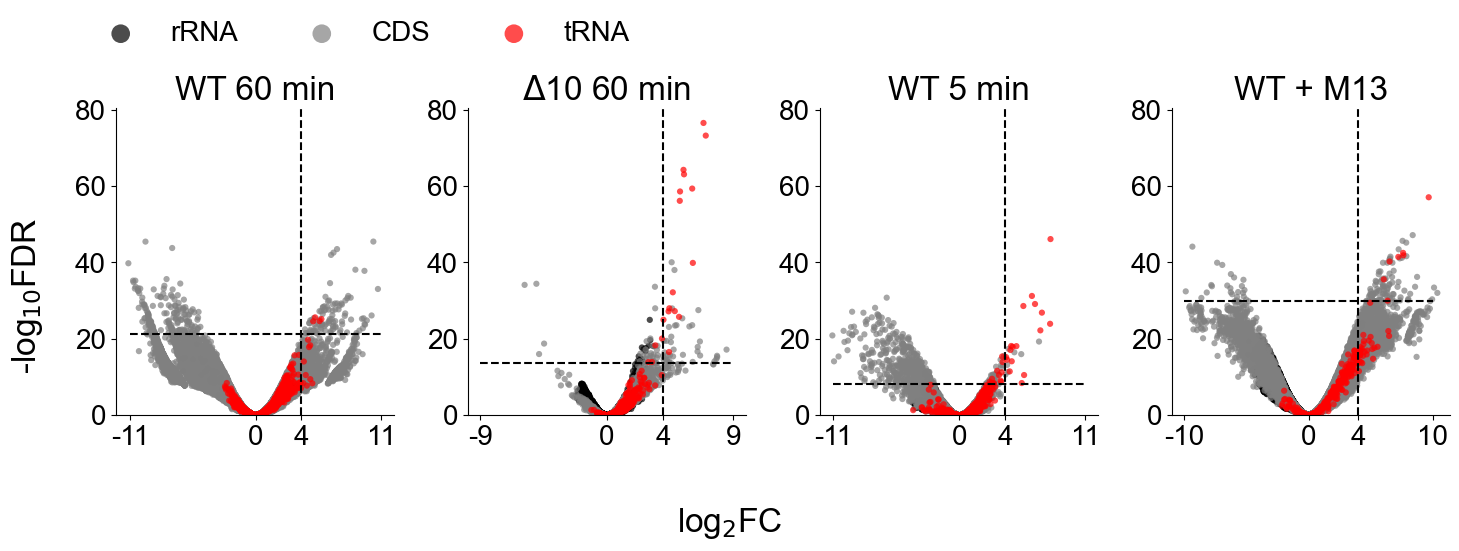

In [12]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

figure = plt.figure(figsize=(15,5))

EcC3000_60_min_volcano = plt.subplot(1, 4, 1)
Ecd10LVM_volcano = plt.subplot(1, 4, 2)
EcC3000_5_min_volcano = plt.subplot(1, 4, 3)
EcC3000_M13_volcano = plt.subplot(1, 4, 4)

y_max = max(np.concatenate([-np.log10(EcC3000_60_min_TCS_table["PValue.adj"].tolist()), 
                            -np.log10(Ecd10LVM_TCS_table["PValue.adj"].tolist()), 
                            -np.log10(EcC3000_5_min_TCS_table["PValue.adj"].tolist()), 
                            -np.log10(EcC3000_M13_TCS_table["PValue.adj"].tolist())]))
ylim = (0, y_max*1.05)

draw_volcano_plot(subplot=EcC3000_60_min_volcano, 
                  source_table=EcC3000_60_min_TCS_table, plot_label="WT 60 min", ext_ylim=ylim, top_N_cutoff=100)
draw_volcano_plot(subplot=Ecd10LVM_volcano, 
                  source_table=Ecd10LVM_TCS_table, plot_label="$\Delta$10 60 min", ext_ylim=ylim, top_N_cutoff=100)
draw_volcano_plot(subplot=EcC3000_5_min_volcano, 
                  source_table=EcC3000_5_min_TCS_table, plot_label="WT 5 min", ext_ylim=ylim, top_N_cutoff=100)
draw_volcano_plot(subplot=EcC3000_M13_volcano, 
                  source_table=EcC3000_M13_TCS_table, plot_label="WT + M13", ext_ylim=ylim, top_N_cutoff=100)

dots, labels = EcC3000_60_min_volcano.get_legend_handles_labels()
    
figure.legend(dots, labels, loc="upper right", ncol=3, frameon=False, markerscale=3, bbox_to_anchor=(0.45, 1.1))

figure.supxlabel("log$_2$FC")
figure.supylabel("-log$_{10}$FDR")

figure.align_labels()
figure.tight_layout()

In [13]:
figure.savefig("combine_volcano_plots/Pictures/combined_volcano_plots_with_thresholds_unique_tRNAs.png", dpi=300, 
               bbox_inches = "tight")

In [14]:
def draw_volcano_plot_wrapper(source_table, title, file):
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 20
    figure = plt.figure(figsize=(5,7))
    volcano = plt.subplot()
    ylim = (0, 1.05*max(-np.log10(source_table["PValue.adj"].tolist())))
    draw_volcano_plot(source_table=source_table, subplot=volcano, plot_label=title, ext_ylim=ylim, top_N_cutoff=100)
    
    volcano.set_xlabel("log$_2$FC")
    volcano.set_ylabel("-log$_{10}$FDR")
    
    dots, labels = volcano.get_legend_handles_labels()
    figure.legend(dots, labels, loc="upper left", ncol=1, frameon=False, markerscale=3, bbox_to_anchor=(0.9, 0.9))

    figure.align_labels()
    figure.tight_layout()
    
    figure.savefig(file, dpi=300, bbox_inches = "tight")

65.25112412687771


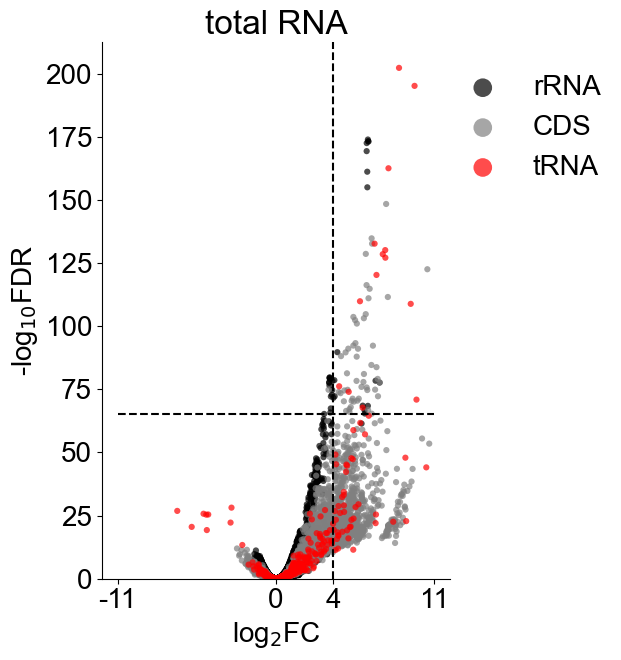

In [15]:
draw_volcano_plot_wrapper(source_table=total_RNA_TCS_table, title="total RNA", 
                          file="combine_volcano_plots/Pictures/total_RNA_volcano_unique_tRNAs.png")

13.712130862824806


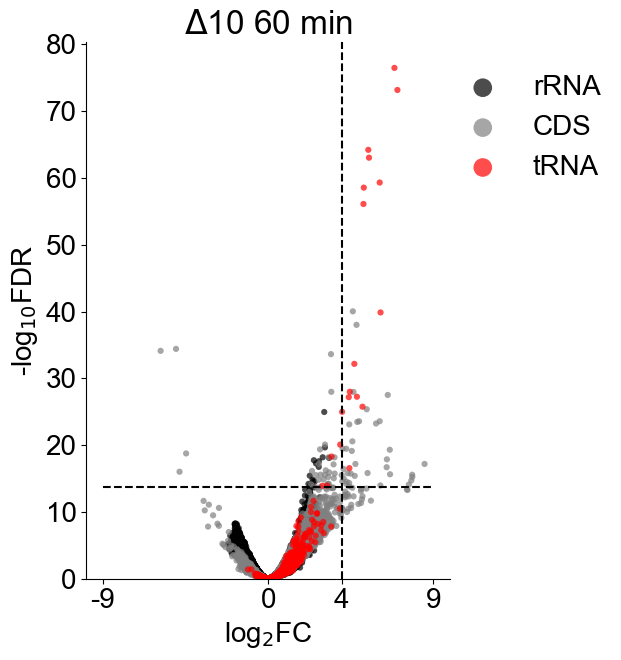

In [16]:
draw_volcano_plot_wrapper(source_table=Ecd10LVM_TCS_table, title="$\Delta$10 60 min", 
                          file="combine_volcano_plots/Pictures/Ecd10_volcano_unique_tRNAs.png")

8.076542638924984


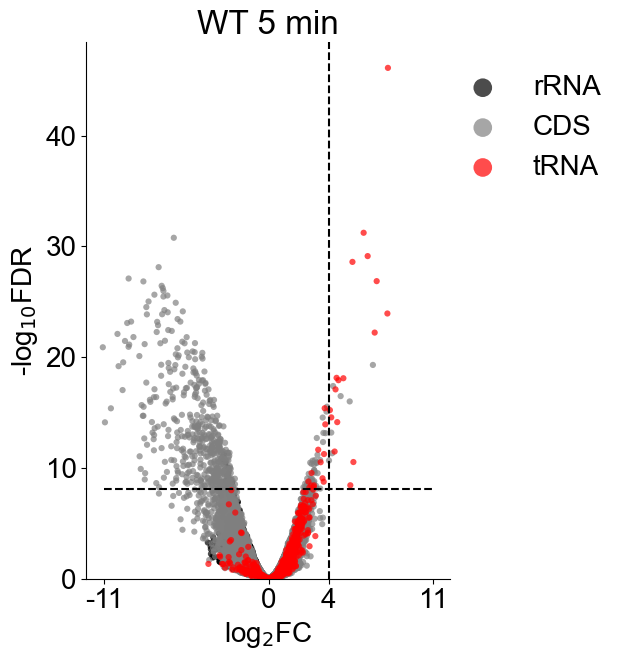

In [17]:
draw_volcano_plot_wrapper(source_table=EcC3000_5_min_TCS_table, title="WT 5 min", 
                          file="combine_volcano_plots/Pictures/EcC3000_5_min_volcano_unique_tRNAs.png")

29.86967116281612


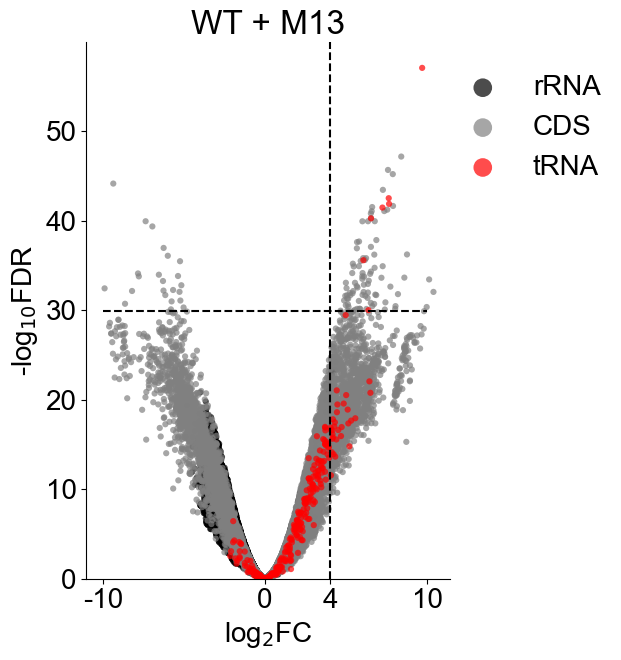

In [18]:
draw_volcano_plot_wrapper(source_table=EcC3000_M13_TCS_table, title="WT + M13", 
                          file="combine_volcano_plots/Pictures/EcC3000_M13_volcano_unique_tRNAs.png")